# TP 2 Multitâches 
# Exercice 2 - Facteurs de nombres entiers

## Introduction

Cet exercice nécessite le package **Numba**. 

L'objectif est de paralléliser un algorithme par **multiprocessing** et **multithreading** à l'aide du module Python **concurrent.futures** et de comparer les performances obtenues.

In [1]:
import numpy as np
from numba import njit
import time
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


La fonction `factor_01(n)` construit de façon naïve par compréhension la liste des différents facteurs entiers de `n` strictement inférieur à `n`.

In [2]:
def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n.
    """
    return [i for i in range(1, n) if n % i == 0]

La fonction `main(a, b)` construit par compréhension la liste de la somme de tous les facteurs de chaque nombre entier `n` compris entre `a` et `b` donnés en arguments du script.

In [3]:
def main(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b.
    """
    return [sum(factor_01(n)) for n in range(a, b + 1)]

## 1 - Préliminaires

1.a) Mesurer les temps d'exécution de `main` pour différentes valeurs de `a` et `b`

For 100 numbers, compute in 0.000141143798828125 seconds
For 200 numbers, compute in 0.0004525184631347656 seconds
For 500 numbers, compute in 0.0027332305908203125 seconds
For 1000 numbers, compute in 0.011389017105102539 seconds
For 2000 numbers, compute in 0.04623270034790039 seconds
For 2500 numbers, compute in 0.07256889343261719 seconds
For 5000 numbers, compute in 0.29839420318603516 seconds
For 7500 numbers, compute in 0.675581693649292 seconds
For 10000 numbers, compute in 1.2147295475006104 seconds


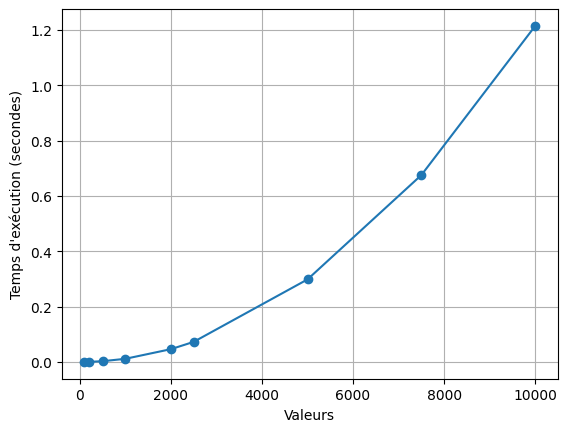

In [4]:
b_values = [100, 200 , 500, 1000, 2000, 2500, 5000, 7500, 10000]

times = []

for i in range(len(b_values)):
    tic = time.time()
    mains = main(1, b_values[i])
    toc = time.time()
    elapsed_time = toc - tic 
    times.append(elapsed_time) 
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

plt.plot(b_values, times, marker='o')
plt.xlabel('Valeurs')
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()

1.b) Sur la base de `main`, écrire une fonction `main_map` afin d'utiliser la méthode `map` native de Python

In [5]:
def main_map(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en utilisant map.
    """
    return list(map(lambda n: sum(factor_01(n)), range(a, b + 1)))


1.c) Mesurer les performances de cette nouvelle version

For 100 numbers, compute in 0.00018548965454101562 seconds
For 200 numbers, compute in 0.0004792213439941406 seconds
For 500 numbers, compute in 0.0027976036071777344 seconds
For 1000 numbers, compute in 0.011323928833007812 seconds
For 2000 numbers, compute in 0.04748082160949707 seconds
For 2500 numbers, compute in 0.07483553886413574 seconds
For 5000 numbers, compute in 0.3159966468811035 seconds
For 7500 numbers, compute in 0.704012393951416 seconds
For 10000 numbers, compute in 1.266359567642212 seconds


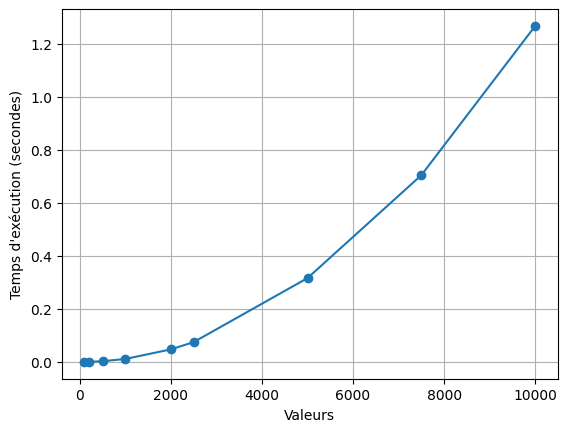

In [6]:
times = []

for i in range(len(b_values)):
    tic = time.time()
    mains = main_map(1, b_values[i])
    toc = time.time()
    elapsed_time = toc - tic 
    times.append(elapsed_time) 
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

plt.plot(b_values, times, marker='o')
plt.xlabel('Valeurs')
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()

## 2 - Multiprocessing

2.a) Sur la base de `main_map`, écrire une fonction `main_mp` qui dispatche les tâches effectuées par le `map` entre les différents processus d’un pool de `n` processus, `n` donné en argument de la fonction `main_mp`

In [7]:
def calculate_sum(start, end):
    """
    Calculer la somme des facteurs pour tous les entiers de start à end inclus.
    """
    return [sum(factor_01(n)) for n in range(start, end + 1)]

def process_range(r):
    """
    Fonction intermédiaire pour appeler calculate_sum sur un intervalle [start, end].
    Cette fonction est nécessaire pour être sérialisée par multiprocessing.
    """
    return calculate_sum(r[0], r[1])

def main_mp(a, b, n):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b
    en utilisant un pool de n processus.
    """
    # Découper la plage [a, b] en n parties égales
    step = (b - a + 1) // n
    ranges = [(a + i * step, a + (i + 1) * step - 1) for i in range(n)]
    # Le dernier sous-ensemble peut aller jusqu'à b, donc on l'ajuste
    ranges[-1] = (ranges[-1][0], b)
    
    # Créer un ProcessPoolExecutor à l'intérieur de la fonction main_mp
    with ProcessPoolExecutor(max_workers=n) as executor:
        results = list(executor.map(process_range, ranges))
    
    # Fusionner les résultats
    return [item for sublist in results for item in sublist]

2.b) Mesurer les performances pour un nombre différent de processus et des valeurs différentes de `a` et `b`

For b=100 with n=2, computed in 0.0161 seconds
For b=200 with n=2, computed in 0.0092 seconds
For b=500 with n=2, computed in 0.0170 seconds
For b=1000 with n=2, computed in 0.0182 seconds
For b=2000 with n=2, computed in 0.0445 seconds
For b=2500 with n=2, computed in 0.0696 seconds
For b=5000 with n=2, computed in 0.2436 seconds
For b=7500 with n=2, computed in 0.5295 seconds
For b=10000 with n=2, computed in 0.9230 seconds
For b=100 with n=4, computed in 0.0137 seconds
For b=200 with n=4, computed in 0.0136 seconds
For b=500 with n=4, computed in 0.0142 seconds
For b=1000 with n=4, computed in 0.0176 seconds
For b=2000 with n=4, computed in 0.0346 seconds
For b=2500 with n=4, computed in 0.0471 seconds
For b=5000 with n=4, computed in 0.1473 seconds
For b=7500 with n=4, computed in 0.3260 seconds
For b=10000 with n=4, computed in 0.5515 seconds
For b=100 with n=8, computed in 0.0234 seconds
For b=200 with n=8, computed in 0.0229 seconds
For b=500 with n=8, computed in 0.0239 seconds

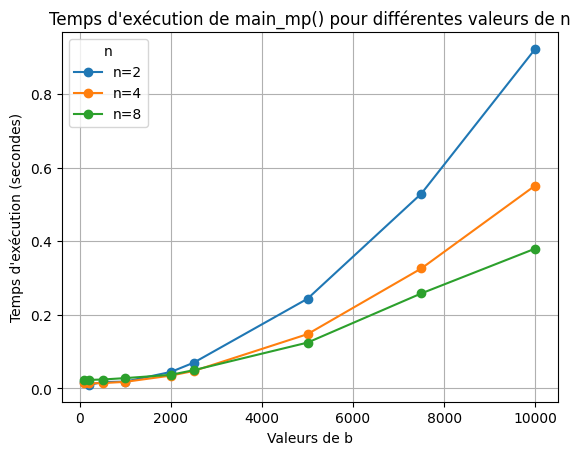

In [8]:
n_values = [2, 4, 8]  # Três valores de 'n' que você deseja testar

# Lista para armazenar os tempos de execução para cada 'n'
times_for_n_values = {n: [] for n in n_values}

# Medir o tempo de execução de main_mp para diferentes b_values e n
for n in n_values:
    for b in b_values:
        tic = time.time()
        mains = main_mp(1, b, n)  # Supondo que você tenha a função main_mp definida
        toc = time.time()
        elapsed_time = toc - tic
        times_for_n_values[n].append(elapsed_time)
        print(f"For b={b} with n={n}, computed in {elapsed_time:.4f} seconds")

# Plotando os resultados
for n in n_values:
    plt.plot(b_values, times_for_n_values[n], marker='o', label=f'n={n}')

plt.xlabel('Valeurs de b')
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution de main_mp() pour différentes valeurs de n")
plt.legend(title="n")
plt.grid(True)
plt.show()

2.c) Utiliser le décorateur `njit` (sans activer le `nogil`) de `numba` sur la fonction `factor_01` et mesurer les performances (comparer avec une version *jittée* sans multiprocessing)

In [9]:
@njit
def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n.
    """
    return [i for i in range(1, n) if n % i == 0]

For b=100, computed in 0.0001 seconds without multiprocessing
For b=200, computed in 0.0001 seconds without multiprocessing
For b=500, computed in 0.0003 seconds without multiprocessing
For b=1000, computed in 0.0011 seconds without multiprocessing
For b=2000, computed in 0.0040 seconds without multiprocessing
For b=2500, computed in 0.0056 seconds without multiprocessing
For b=5000, computed in 0.0207 seconds without multiprocessing
For b=7500, computed in 0.0460 seconds without multiprocessing
For b=10000, computed in 0.0786 seconds without multiprocessing
For b=100 with n=2, computed in 0.0118 seconds with multiprocessing
For b=200 with n=2, computed in 0.0124 seconds with multiprocessing
For b=500 with n=2, computed in 0.0118 seconds with multiprocessing
For b=1000 with n=2, computed in 0.0120 seconds with multiprocessing
For b=2000 with n=2, computed in 0.0146 seconds with multiprocessing
For b=2500 with n=2, computed in 0.0165 seconds with multiprocessing
For b=5000 with n=2, com

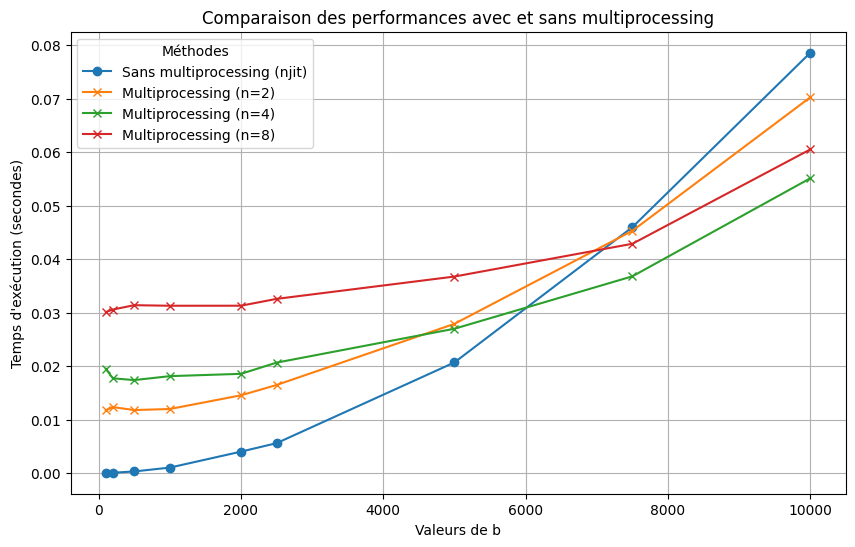

In [13]:
times_without_mp = []

for b in b_values:
    tic = time.time()
    mains = main(1, b)  # Appel de la version non-parallélisée avec njit
    toc = time.time()
    elapsed_time = toc - tic
    times_without_mp.append(elapsed_time)
    print(f'For b={b}, computed in {elapsed_time:.4f} seconds without multiprocessing')

# Mesure du temps d'exécution de la version avec multiprocessing (avec main_mp)
n_values = [2, 4, 8]  # Nombre de processus pour multiprocessing
times_with_mp = {n: [] for n in n_values}

for n in n_values:
    for b in b_values:
        tic = time.time()
        mains_mp = main_mp(1, b, n)  # Appel de main_mp avec multiprocessing
        toc = time.time()
        elapsed_time = toc - tic
        times_with_mp[n].append(elapsed_time)
        print(f'For b={b} with n={n}, computed in {elapsed_time:.4f} seconds with multiprocessing')

# Plot des résultats
plt.figure(figsize=(10, 6))

# Graphique pour la version sans multiprocessing
plt.plot(b_values, times_without_mp, marker='o', label='Sans multiprocessing (njit)')

# Graphique pour les versions avec multiprocessing
for n in n_values:
    plt.plot(b_values, times_with_mp[n], marker='x', label=f'Multiprocessing (n={n})')

plt.xlabel('Valeurs de b')
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Comparaison des performances avec et sans multiprocessing")
plt.legend(title="Méthodes")
plt.grid(True)
plt.show()

## 3 - Multithreading

3.a) Sur la base de `main_mp`, écrire une fonction `main_nt` qui utilise du multithreading à la place du multiprocessing

In [11]:
def main_nt(a, b, n):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b
    en utilisant un pool de n threads (multithreading).
    """
    # Fonction qui calcule la somme des facteurs pour un sous-ensemble donné de nombres
    def calculate_sum(start, end):
        return [sum(factor_01(n)) for n in range(start, end + 1)]
    
    # Découper la plage [a, b] en n parties égales
    step = (b - a + 1) // n
    ranges = [(a + i * step, a + (i + 1) * step - 1) for i in range(n)]
    # Le dernier sous-ensemble peut aller jusqu'à b, donc on l'ajuste
    ranges[-1] = (ranges[-1][0], b)
    
    # Créer un ThreadPoolExecutor à l'intérieur de la fonction main_nt
    with ThreadPoolExecutor(max_workers=n) as executor:
        results = list(executor.map(lambda r: calculate_sum(r[0], r[1]), ranges))
    
    # Fusionner les résultats
    return [item for sublist in results for item in sublist]


3.b) Mesurer les performances de cette version et les comparer aux versions précédentes

For b=100 with n_threads=2, computed in 0.0010 seconds
For b=200 with n_threads=2, computed in 0.0005 seconds
For b=500 with n_threads=2, computed in 0.0010 seconds
For b=1000 with n_threads=2, computed in 0.0020 seconds
For b=2000 with n_threads=2, computed in 0.0042 seconds
For b=2500 with n_threads=2, computed in 0.0059 seconds
For b=5000 with n_threads=2, computed in 0.0168 seconds
For b=7500 with n_threads=2, computed in 0.0359 seconds
For b=10000 with n_threads=2, computed in 0.0616 seconds
For b=100 with n_threads=4, computed in 0.0006 seconds
For b=200 with n_threads=4, computed in 0.0007 seconds
For b=500 with n_threads=4, computed in 0.0013 seconds
For b=1000 with n_threads=4, computed in 0.0024 seconds
For b=2000 with n_threads=4, computed in 0.0044 seconds
For b=2500 with n_threads=4, computed in 0.0060 seconds
For b=5000 with n_threads=4, computed in 0.0137 seconds
For b=7500 with n_threads=4, computed in 0.0243 seconds
For b=10000 with n_threads=4, computed in 0.0435 seco

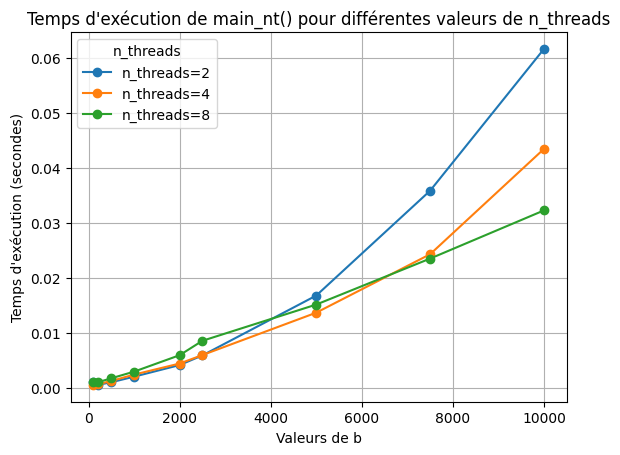

In [18]:
n_threads_values = [2, 4, 8]  # Valores de n_threads que você deseja testar

# Lista para armazenar os tempos de execução para cada n_threads
times_for_n_threads = {n: [] for n in n_threads_values}

# Medir o tempo de execução de main_nt para diferentes b_values e n_threads
for n_threads in n_threads_values:
    for b in b_values:
        tic = time.time()
        mains_nt = main_nt(1, b, n_threads)  # Chamar main_nt com n_threads
        toc = time.time()
        elapsed_time = toc - tic
        times_for_n_threads[n_threads].append(elapsed_time)
        print(f"For b={b} with n_threads={n_threads}, computed in {elapsed_time:.4f} seconds")

# Plotando os resultados
for n_threads in n_threads_values:
    plt.plot(b_values, times_for_n_threads[n_threads], marker='o', label=f'n_threads={n_threads}')

plt.xlabel('Valeurs de b')
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution de main_nt() pour différentes valeurs de n_threads")
plt.legend(title="n_threads")
plt.grid(True)
plt.show()

3.c) Activer le `nogil` dans le décorateur `njit` et comparer les performances

In [15]:
@njit(nogil=True)
def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n avec GIL désactivé.
    """
    factors = []
    for i in range(1, n):
        if n % i == 0:
            factors.append(i)
    return factors

For b=100 with nogil, computed in 0.0017 seconds
For b=200 with nogil, computed in 0.0026 seconds
For b=500 with nogil, computed in 0.0015 seconds
For b=1000 with nogil, computed in 0.0024 seconds
For b=2000 with nogil, computed in 0.0051 seconds
For b=2500 with nogil, computed in 0.0063 seconds
For b=5000 with nogil, computed in 0.0139 seconds
For b=7500 with nogil, computed in 0.0244 seconds
For b=10000 with nogil, computed in 0.0379 seconds


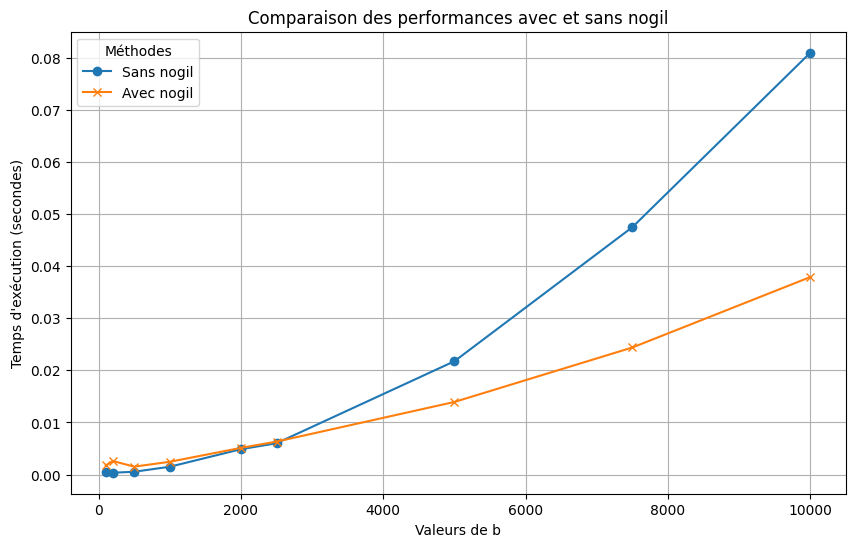

In [17]:
# Mesurer le temps d'exécution pour la version avec nogil
times_with_nogil = []
for b in b_values:
    tic = time.time()
    mains_nogil = main_nt(1, b, 4)  # Utiliser main_mt() avec factor_01_nogil
    toc = time.time()
    elapsed_time = toc - tic
    times_with_nogil.append(elapsed_time)
    print(f'For b={b} with nogil, computed in {elapsed_time:.4f} seconds')

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for the version without nogil
plt.plot(b_values, times_for_n_threads[4], marker='o', label='Sans nogil')

# Plot for the version with nogil
plt.plot(b_values, times_with_nogil, marker='x', label='Avec nogil')

plt.xlabel('Valeurs de b')
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Comparaison des performances avec et sans nogil")
plt.legend(title="Méthodes")
plt.grid(True)
plt.show()
